In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/risks03.csv',encoding="utf-8")

In [ ]:
#df2=pd.read_csv(r'/content/drive/MyDrive/risks02.csv',encoding="utf-8")

In [ ]:
#df1=pd.read_csv(r'/content/drive/MyDrive/risks01.csv',encoding="utf-8")

In [ ]:
#df = pd.concat([df1, df2, df3], axis=0, join='inner')

In [ ]:
df3.shape

(19800, 22)

In [ ]:
#removing the non str values prior to the creation of embeddings
lis1a=df3['10k_risks1A']
lis1aa=[]
for i in lis1a:
    if(type(i)==str):
        lis1aa.append(i)
print(len(lis1aa))
lis1aa=lis1aa[13000:]  #number of observations to be tested

17900


In [ ]:
len(lis1aa)

4900

In [ ]:
lis1aa[0]

' ITEM 1A. RISK FACTORS \n\nAn investment in our common stock is highly speculative, involves a high degree of risk, and should be made only by investors who can afford a complete loss. You should carefully consider the following risk factors, together with the other information in this prospectus, including our financial statements and the related notes, before you decide to buy our common stock. If any of the following risks actually occur, our business, financial condition, or results of operations could be materially adversely affected, the trading of our common stock could decline, and you may lose all or part of your investment therein.\n\nRisks Relating to the Early Stage of our Company \n\nWe are at a very early operational stage and our success is subject to the substantial risks inherent in the establishment of a new business venture. \n\nThe implementation of our business strategy is in a very early stage. Our business and operations should be considered to be in a very earl

In [ ]:
#removing particular phrases from a list of string
import re

def remove_phrases_from_list(list_of_strings, phrases_to_remove):
    cleaned_list = []
    for text in list_of_strings:
        cleaned_text = text
        for phrase in phrases_to_remove:
            cleaned_text = cleaned_text.replace(phrase, '')
        cleaned_list.append(cleaned_text)
    return cleaned_list

# Example usage:
list_of_strings = lis1aa
phrases_to_remove = ["##TABLE_START", "##TABLE_END &#160;", "##TABLE_END", "&#8226;", "&#183;", "FDA&#8217;s"]
cleaned_list = remove_phrases_from_list(list_of_strings, phrases_to_remove)
#print(cleaned_list)


In [ ]:
len(cleaned_list)

4900

In [ ]:
#break into smaller paragraph the cleaned_list delimeter="&#160;"
def separate_paragraphs_from_list(list_of_paragraphs):
    separated_paragraphs = []
    for paragraph in list_of_paragraphs:
        smaller_paragraphs = paragraph.split("&#160;")
        smaller_paragraphs = [p.strip() for p in smaller_paragraphs]
        separated_paragraphs.extend(smaller_paragraphs)
    return separated_paragraphs

# Example usage:
list_of_paragraphs = cleaned_list

result_break = separate_paragraphs_from_list(list_of_paragraphs)
#print(result)


In [ ]:
len(result_break)

348562

In [ ]:
def remove_newlines_and_replace(lst):
    cleaned_list = []
    for text in lst:
        # Remove newline characters
        cleaned_text = text.replace("\n", "")

        # Replace words
        cleaned_text = cleaned_text.replace("risks", "risk")
        cleaned_text = cleaned_text.replace("customers", "customer")
        cleaned_text = cleaned_text.replace("consumers", "consumer")
        cleaned_text = cleaned_text.replace("technologies", "technology")
        cleaned_text = cleaned_text.replace("controls", "control")
        cleaned_text = cleaned_text.replace("company", "companies")
        cleaned_text = cleaned_text.replace("funds", "fund")
        cleaned_text = cleaned_text.replace("corporations", "corporation")
        cleaned_text = cleaned_text.replace("gains", "gain")
        cleaned_text = cleaned_text.replace("properties", "property")
        cleaned_text = cleaned_text.replace("prices", "price")
        cleaned_text = cleaned_text.replace("commodities", "commodity")
        cleaned_text = cleaned_text.replace("regulation", "regulations")
        cleaned_text = cleaned_text.replace("investments", "investment")
        cleaned_text = cleaned_text.replace("acquisitions", "acquisition")
        cleaned_text = cleaned_text.replace("transactions", "transaction")
        cleaned_text = cleaned_text.replace("shareholders", "shareholder")
        cleaned_text = cleaned_text.replace("stockholders", "stockholder")
        cleaned_text = cleaned_text.replace("directors", "director")

        cleaned_list.append(cleaned_text)

    return cleaned_list

# Example usage:
list_of_strings = result_break
cleaned_list_noline = remove_newlines_and_replace(list_of_strings)


In [ ]:
#remove blank lists
def remove_blank_strings(lst):
    cleaned_list = [string for string in lst if string.strip() != ""]
    return cleaned_list

# Example usage:
list_of_strings = cleaned_list_noline
cleaned_list = remove_blank_strings(list_of_strings)
print(len(cleaned_list))


249079


In [ ]:
#cleaned_list is the final list from here on

In [ ]:
# print(df3['10k_risks1A'][1])
#data cleaning
#

#'##TABLE_START &#160; &#149; &#160;' ##TABLE_END &#160;' #remove this

#'&#160;' #separator

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop=list('companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))

In [ ]:
stop_words = set(stopwords.words("english")+stop)

In [ ]:
def preprocess(doc):
    stop=list('companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))
    stop_words = set(stopwords.words("english")+stop)
    ps = PorterStemmer()
    words = word_tokenize(doc.lower())
    #words = [ps.stem(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

#function to perform all the cleaning
import re
def cleanText(text):
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub("@\S+", "", text)
    text = re.sub("#", "", text)
    text = text.replace('\n',"")
    text = re.sub(r'[^a-zA-Z ]+',"",text)
    text = text.lower()
    text = text.strip()
    return text

In [ ]:
#cleaning all the risks in the list lis1aa
clean_list=[cleanText(i) for i in cleaned_list]

In [ ]:
len(clean_list)

249079

In [ ]:
processed_text_mini= [preprocess(l) for l in clean_list]

In [ ]:
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 43.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.

In [ ]:
from gensim.corpora import Dictionary

documents = processed_text_mini  # Your list of preprocessed documents

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

In [ ]:
from gensim.models import LdaModel

num_topics = 30
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = lda_model.print_topics(num_words=30)  # Print the top 30 words for each topic
for topic in topics:
    print(topic)

(1, '0.049*"acquisition" + 0.029*"transaction" + 0.020*"businesses" + 0.018*"liabilities" + 0.013*"acquire" + 0.013*"potential" + 0.013*"impairment" + 0.012*"acquired" + 0.010*"benefits" + 0.009*"opportunities" + 0.009*"seismic" + 0.009*"accounts" + 0.009*"undeveloped" + 0.009*"associated" + 0.008*"expenses" + 0.008*"addition" + 0.008*"suspension" + 0.008*"different" + 0.008*"expected" + 0.007*"valuation" + 0.007*"closely" + 0.007*"make" + 0.007*"joint" + 0.007*"particular" + 0.007*"companies" + 0.007*"realize" + 0.007*"risk" + 0.007*"anticipated" + 0.006*"whether" + 0.006*"incur"')
(0, '0.061*"director" + 0.042*"combination" + 0.041*"stockholder" + 0.035*"shareholder" + 0.032*"board" + 0.028*"control" + 0.027*"officers" + 0.024*"interests" + 0.015*"directors" + 0.015*"conflicts" + 0.015*"provisions" + 0.015*"approval" + 0.014*"voting" + 0.013*"transaction" + 0.011*"change" + 0.010*"vote" + 0.010*"companies" + 0.010*"incorporation" + 0.010*"affiliates" + 0.009*"majority" + 0.009*"abili

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_assignments = [lda_model[doc] for doc in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.0
    Uninstalling pandas-2.1.0:
      Successfully uninstalled pandas-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [32]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
pyLDAvis.display(prepared_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


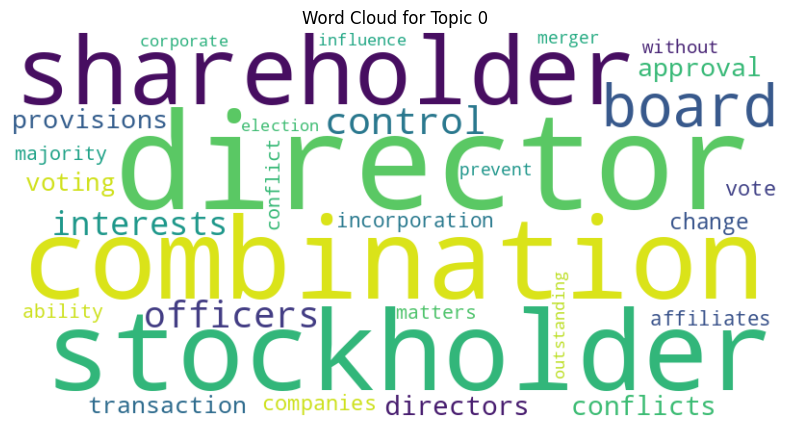

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


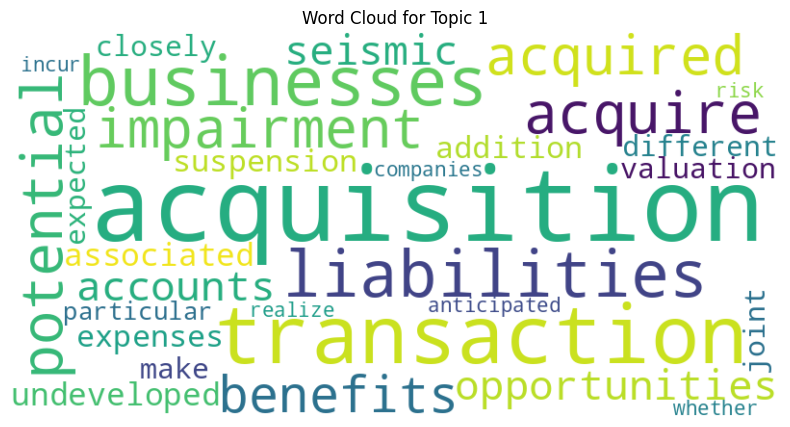

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


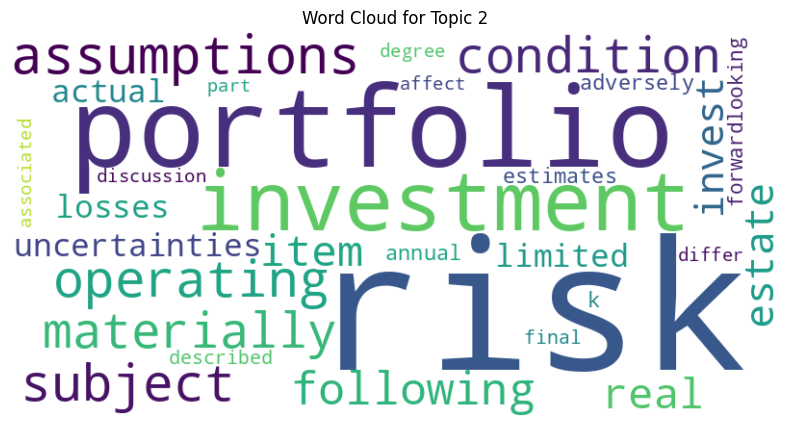

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


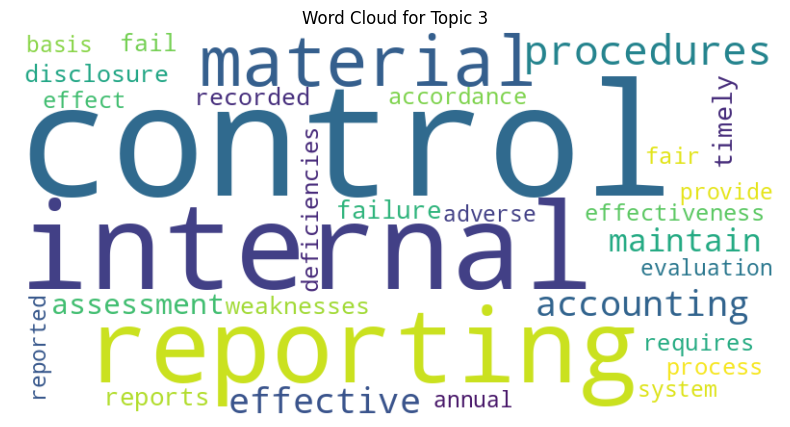

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


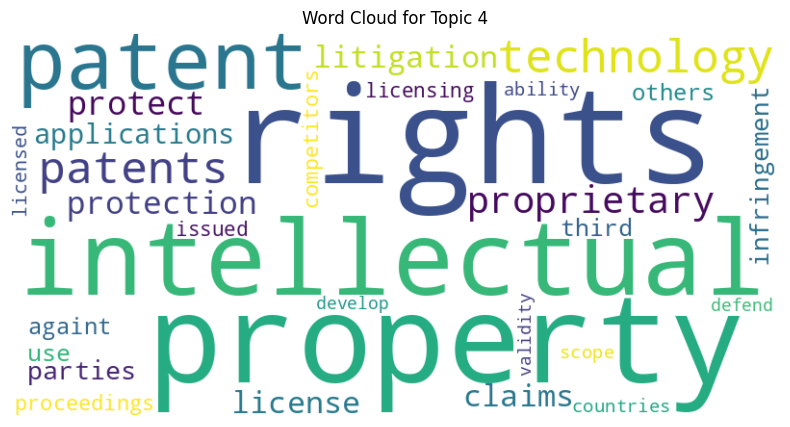

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


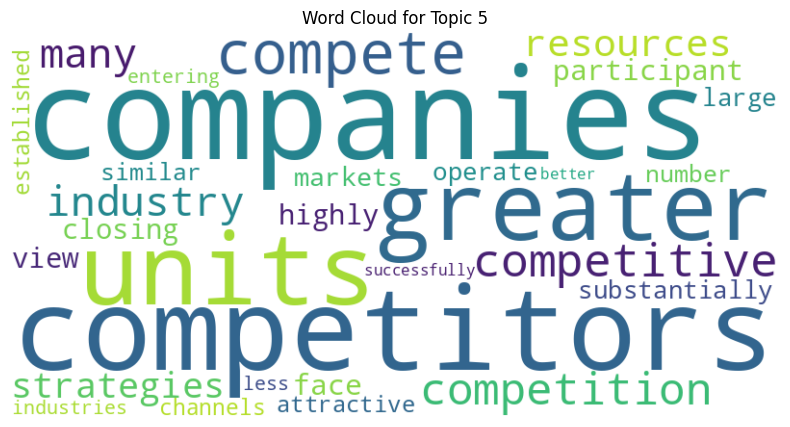

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


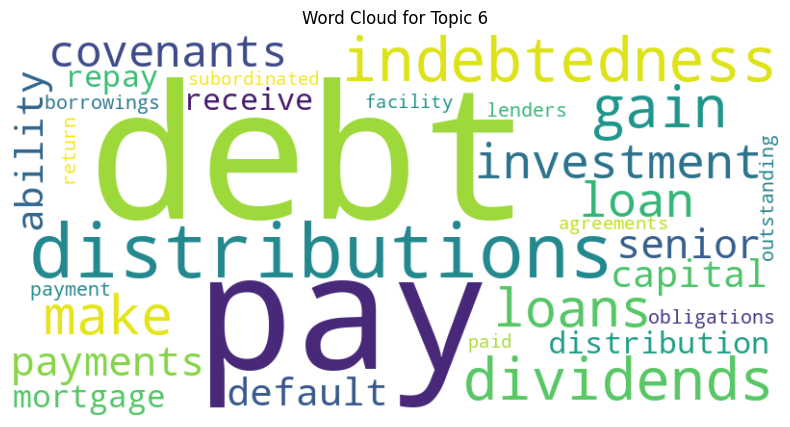

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


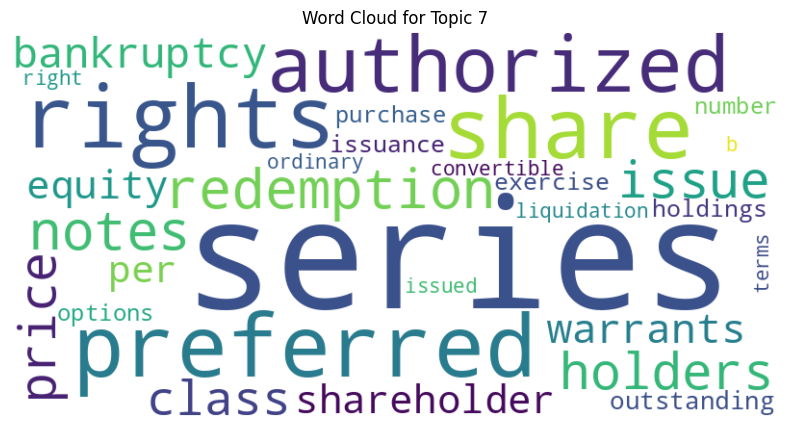

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


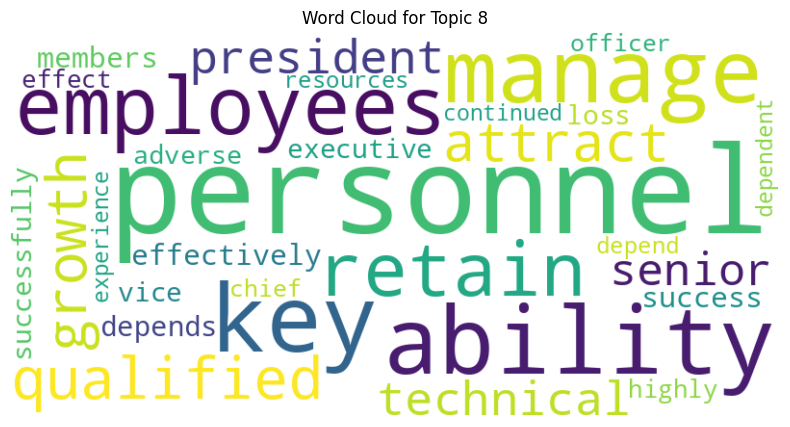

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


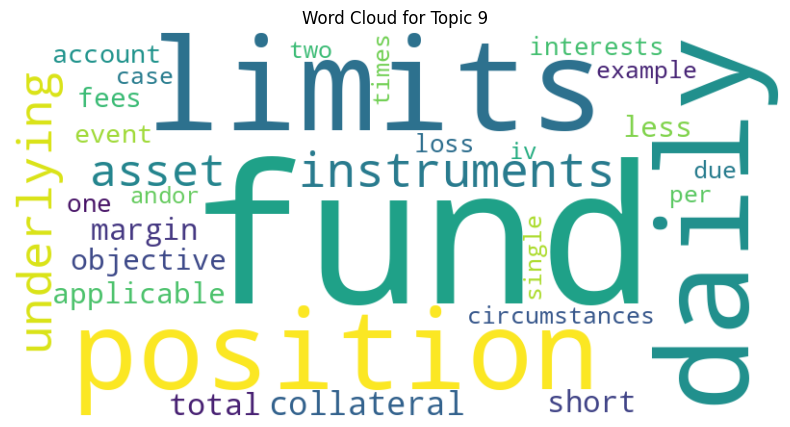

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


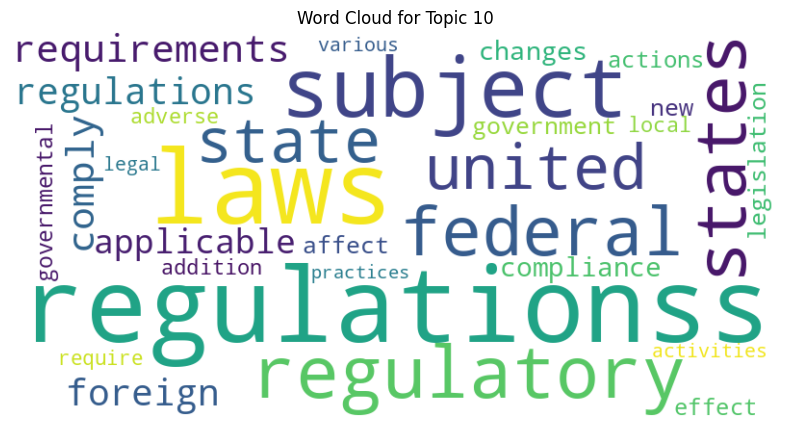

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


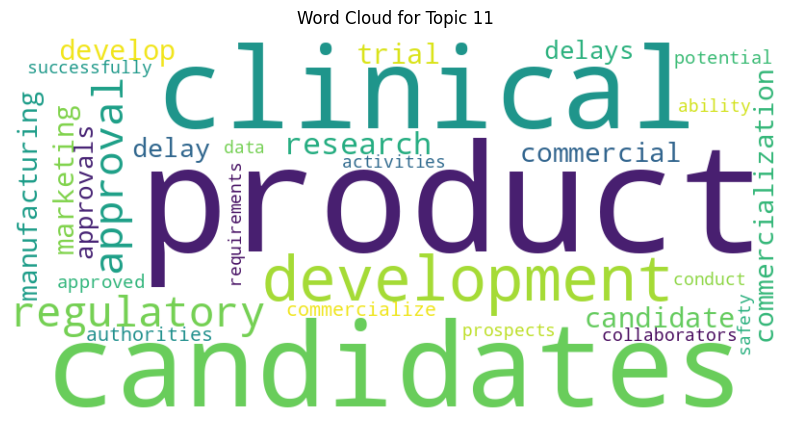

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


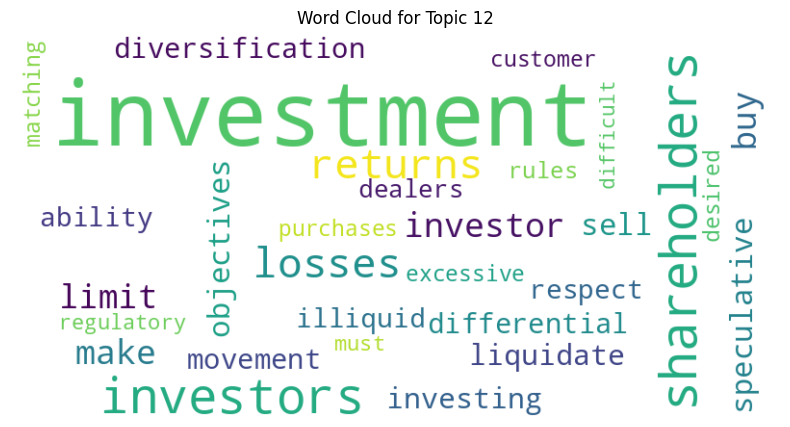

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


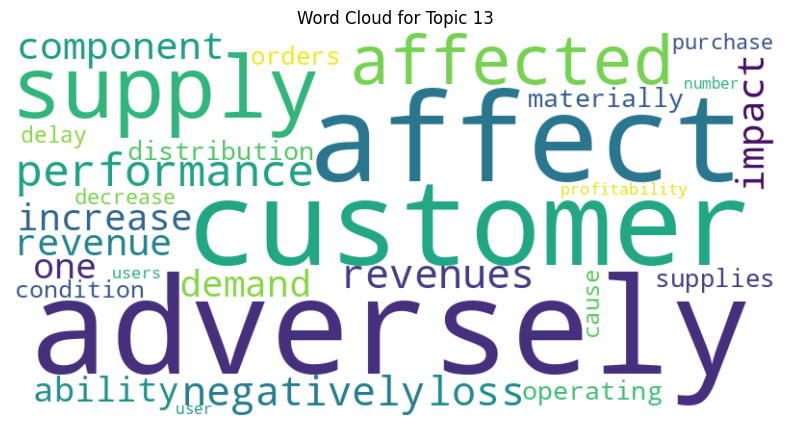

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


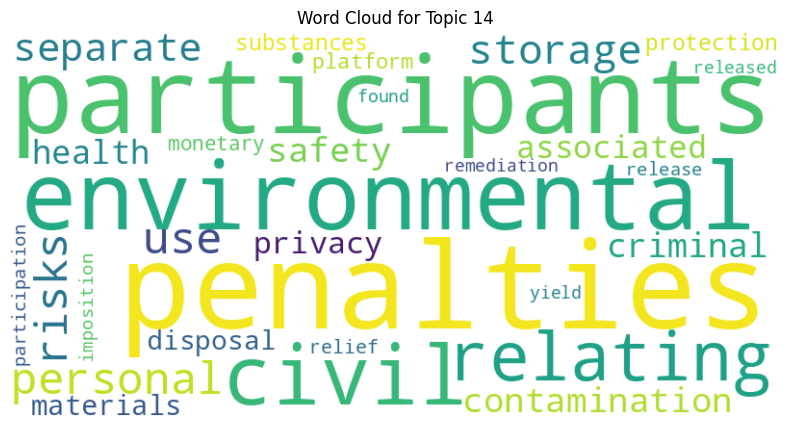

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


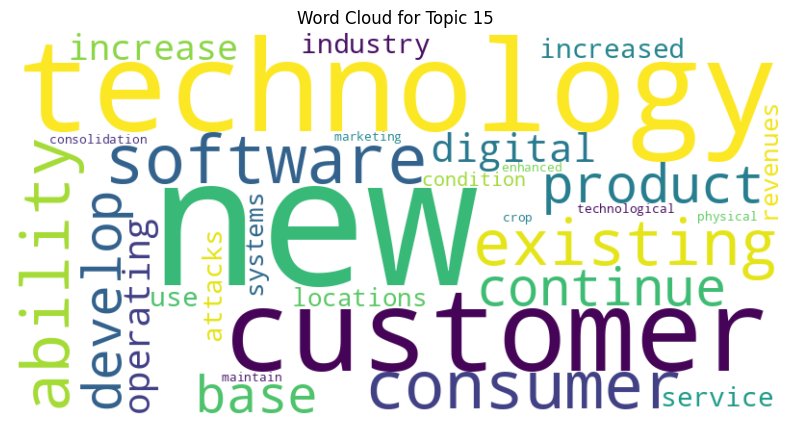

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


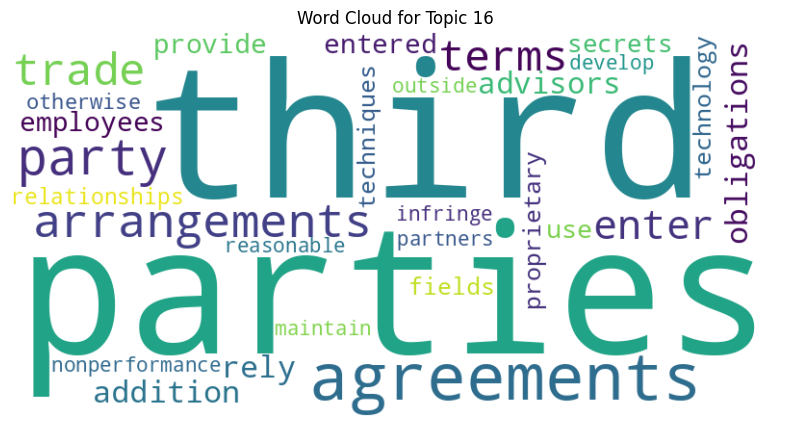

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


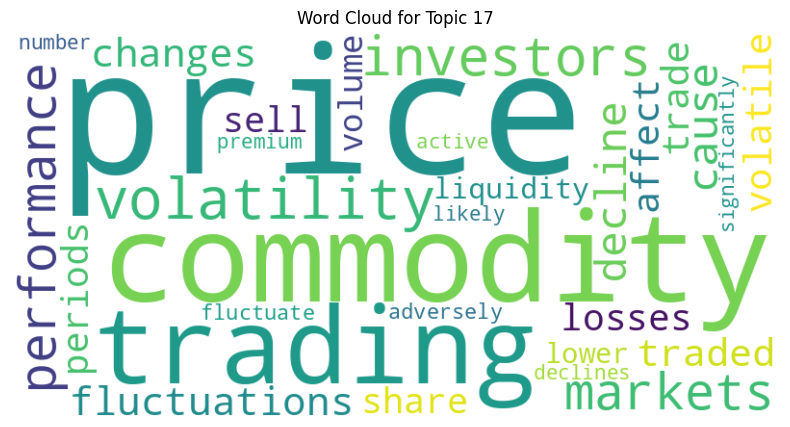

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


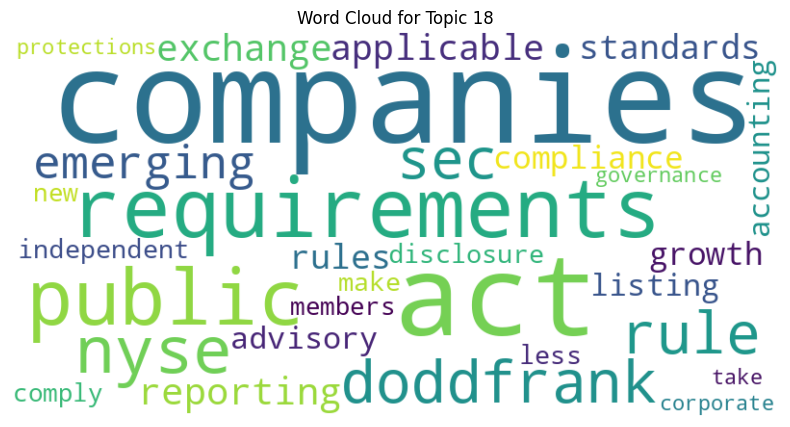

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


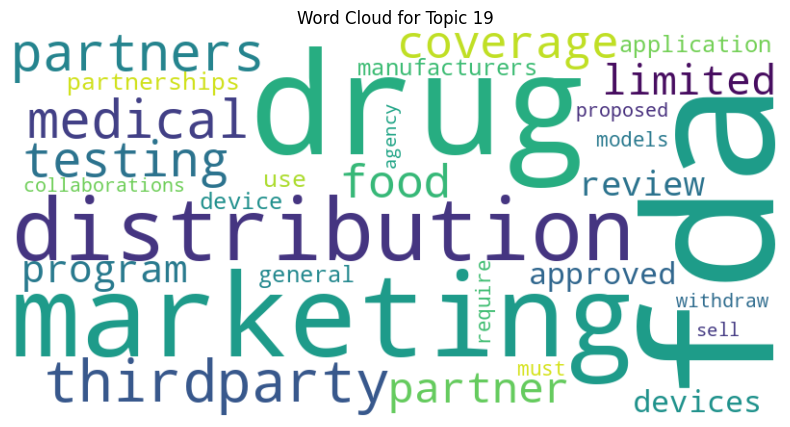

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


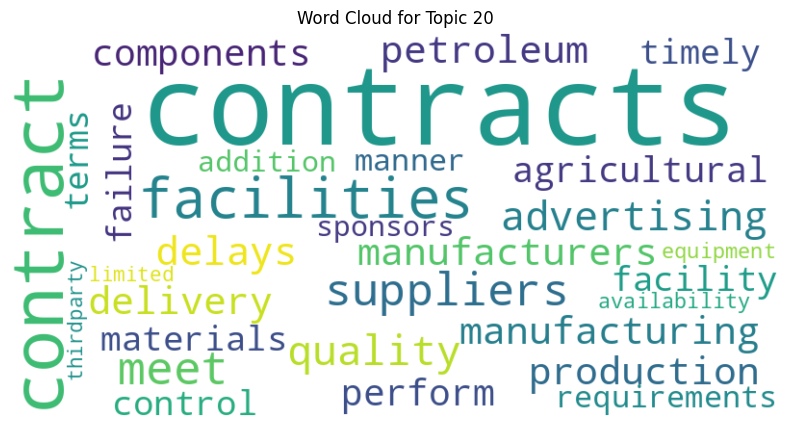

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


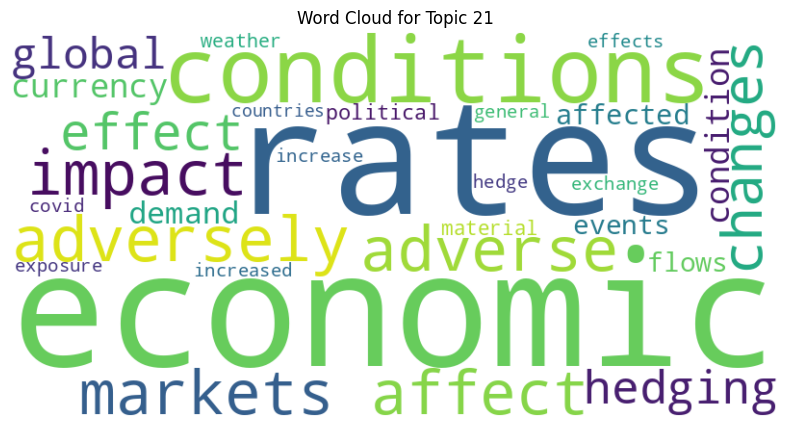

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


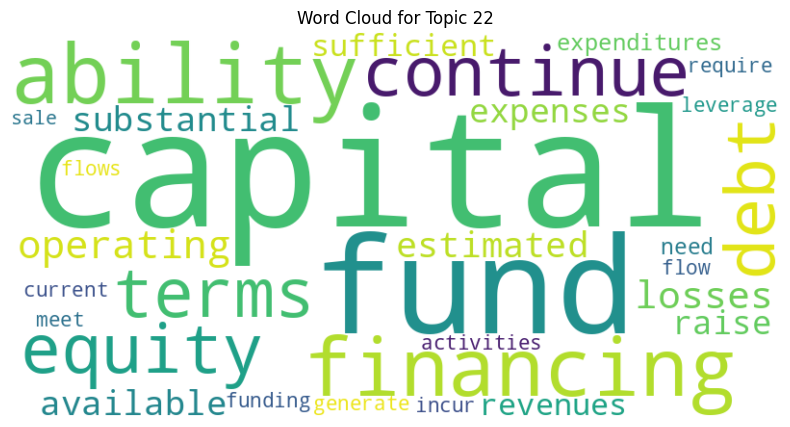

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


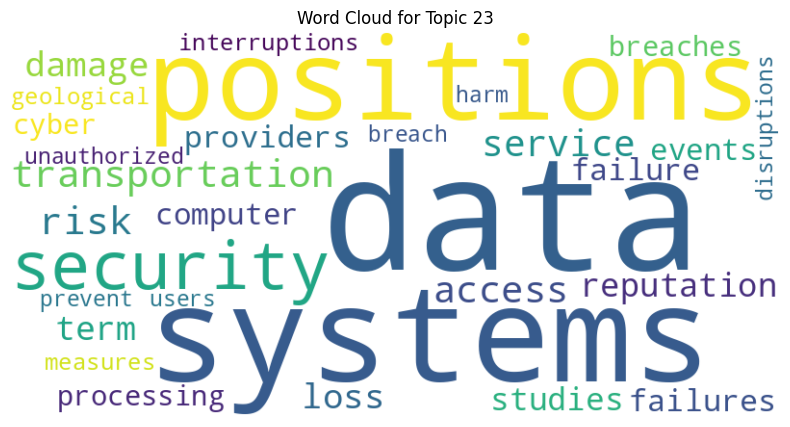

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


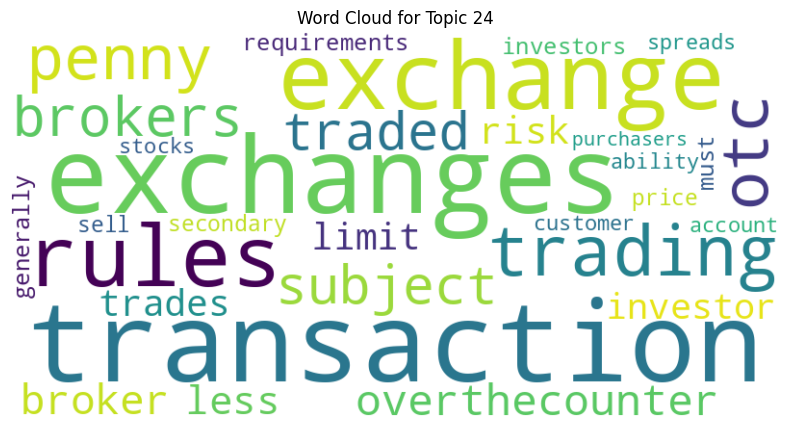

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


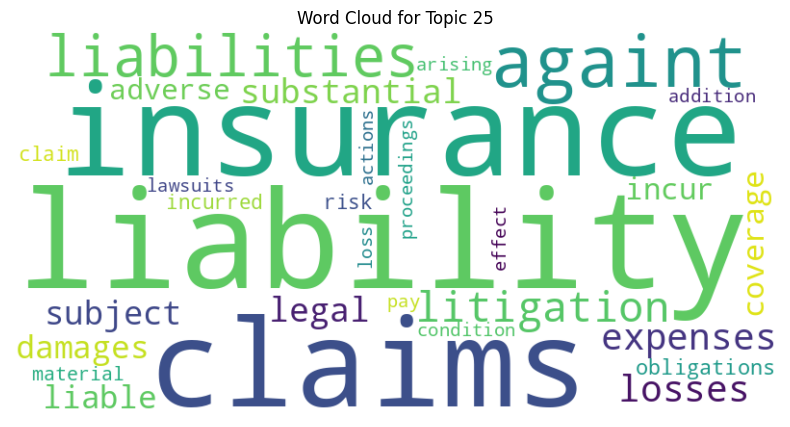

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


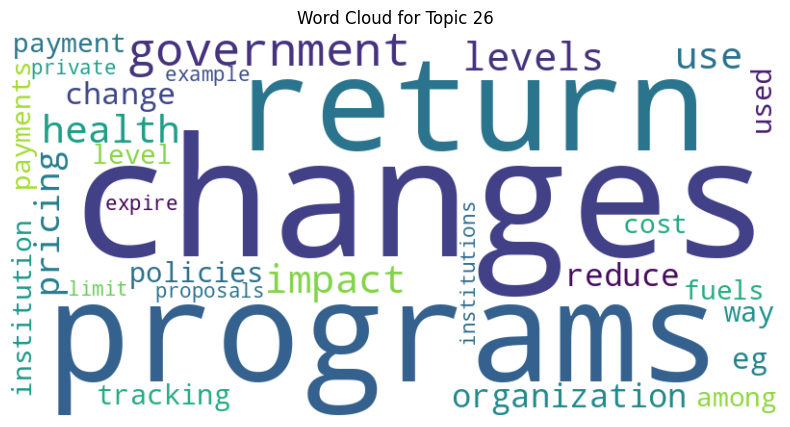

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


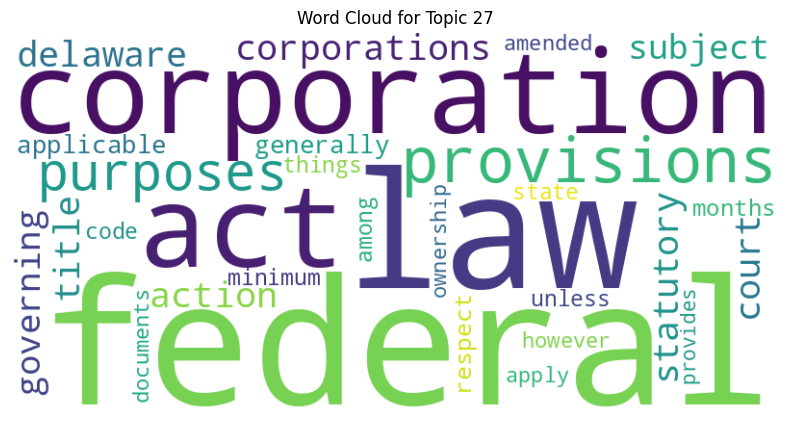

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


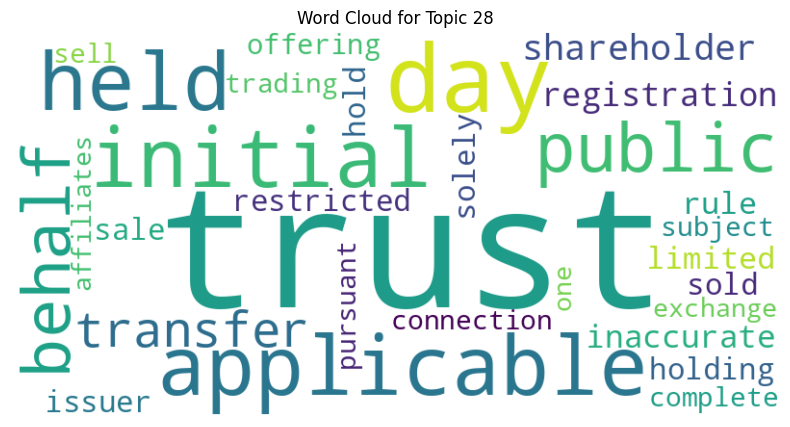

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


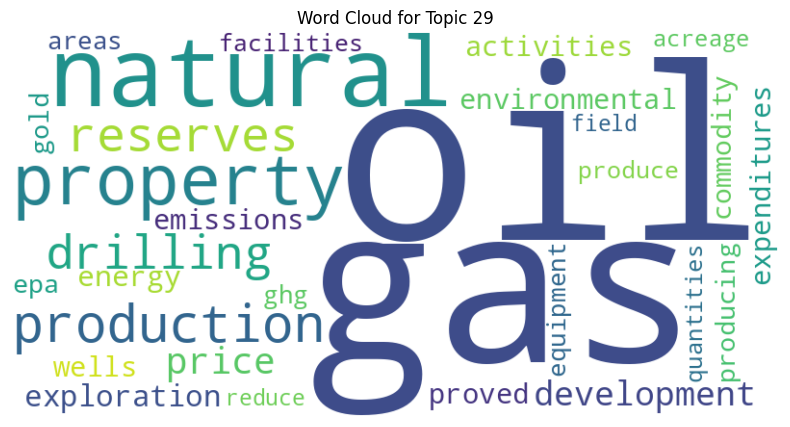

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary):
    words = lda_model.show_topic(topic_id, topn=30)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.axis("off")
    plt.show()

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id in range(0,num_topics):
    generate_wordcloud_for_topic(topic_id, lda_model, dictionary)